In [ ]:
import torch
print(torch.__version__)

import torchvision
from torchvision import datasets, transforms

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, )
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, )

print(len(mnist_trainset))
print(len(mnist_testset))

1.9.0+cu102
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


4
torch.Size([784])


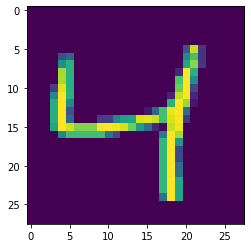

In [ ]:
import matplotlib.pyplot as plt

i = 2
example = mnist_trainset[i]
img = example[0]
label = example[1]
plt.imshow(img)
print(label)

trans = transforms.ToTensor()
tensor = trans(img).view(28*28)
print(tensor.shape)

In [ ]:
import torch.nn as nn

W1 = torch.nn.Parameter(torch.zeros(64, 42).uniform_(-0.1, 0.1))
b = torch.nn.Parameter(torch.zeros(64).uniform_(-0.1, 0.1))
W2 = torch.nn.Parameter(torch.zeros(784, 64).uniform_(-0.1, 0.1))

W3 = torch.nn.Parameter(torch.zeros(32, 794).uniform_(-0.1, 0.1))
c = torch.nn.Parameter(torch.zeros(32).uniform_(-0.1, 0.1))
W4 = torch.nn.Parameter(torch.zeros(32, 32).uniform_(-0.1, 0.1))

print(W1)

Parameter containing:
tensor([[-0.0670, -0.0743, -0.0056,  ...,  0.0014,  0.0916, -0.0040],
        [-0.0883, -0.0206,  0.0081,  ...,  0.0156, -0.0827, -0.0467],
        [-0.0227, -0.0627,  0.0242,  ...,  0.0276, -0.0712, -0.0075],
        ...,
        [ 0.0689,  0.0639, -0.0914,  ..., -0.0346, -0.0321, -0.0780],
        [ 0.0790, -0.0780,  0.0623,  ..., -0.0231, -0.0259,  0.0313],
        [ 0.0511,  0.0721, -0.0692,  ..., -0.0743, -0.0073, -0.0231]],
       requires_grad=True)


In [ ]:
import math
lr = 1e-4
sig1 = 1.5
sig2 = 2
k = 2
import random

optimizer = torch.optim.Adam([W1, b, W2, W3, c, W4], lr=lr)

losses = []
updates = []
update = 0
import tqdm
for epoch in range(5):
  for num in tqdm.tqdm(range(len(mnist_trainset))):
    i = random.randint(0, 1000)
    example = mnist_trainset[i]
    label = example[1]
    X = torch.zeros(10)
    X[label] = 1

    epsilon = torch.randn(32)
    optimizer.zero_grad()
    img = example[0]
    tensor = trans(img).view(28*28)
    
    Mu = W4 @ torch.relu(W3 @ torch.cat((X, tensor), 0) + c)
    z = Mu + math.sqrt(sig2) * epsilon
    Y = W2 @ torch.relu(W1 @ torch.cat((X, z), 0) + b)
  
    loss = math.log(sig1) + 0.5 * torch.dot((tensor - Y), (tensor - Y)) / (sig1 * sig1) + 0.5 * (sig2 + torch.transpose(Mu, 0, -1) @ Mu - k - math.log(sig2)) 
    update += 1
    updates.append(update)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

100%|██████████| 60000/60000 [03:24<00:00, 293.64it/s]


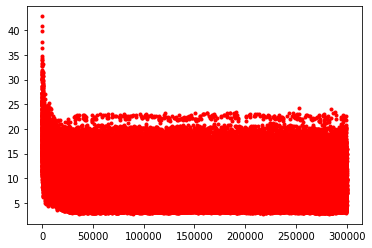

In [ ]:
import matplotlib.pyplot as plt
plt.plot(updates, losses, 'r.')

torch.Size([784])


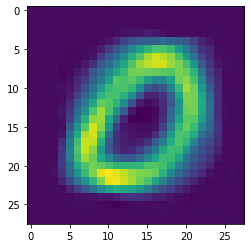

In [ ]:
labeltest = 0
Xtest = torch.zeros(10)
Xtest[labeltest] = 1
ztest = torch.randn(32)
test = W2 @ torch.relu(W1 @ torch.cat((Xtest, ztest), 0) + b)
print(test.shape)
plt.imshow(test.view(28,28).detach())

In [ ]:
Xtest = torch.nn.Parameter(torch.zeros(10))
Ytest = torch.nn.Parameter(torch.zeros(5).uniform_(0, 1))
print(Xtest)
print(Ytest)
print(torch.cat((Xtest, Ytest), 0))

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([0.3888, 0.7970, 0.5235, 0.7617, 0.1398], requires_grad=True)
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3888, 0.7970, 0.5235, 0.7617, 0.1398], grad_fn=<CatBackward>)
